# Identification of Underfitting and Overfitting in the models
In this notebook we approach to the subject of performance evaluation of the models. 
\
We will be using the **learning curves** to obtain a graphical indicators of overfitting and underfitting
\
We start by introducing the concept of:
### Cross validation 


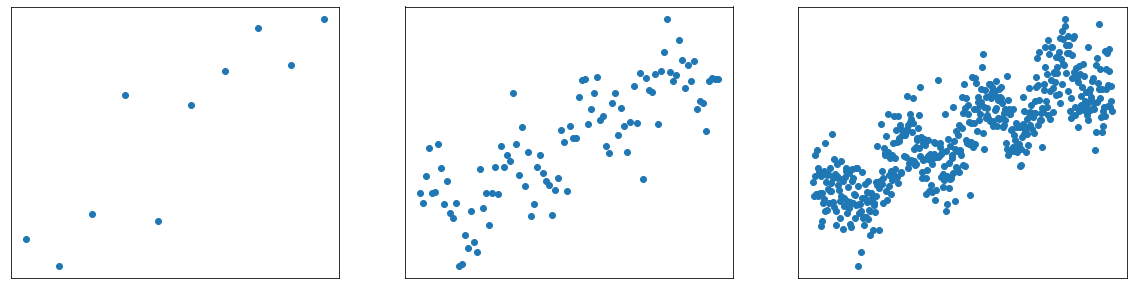

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from Utilities import make_dataset
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for n_samples, ax in zip([10, 100, 500], axes.ravel()):
    X, y = make_dataset(n_samples=n_samples)
    ax.scatter(X, y)
    ax.set_xticks(())
    ax.set_yticks(())

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import pandas as pd

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [8]:
boston.data
boston.feature_names
raw_df = pd.DataFrame(boston.data, columns=boston.feature_names)
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
cv = KFold(10, shuffle=True)
train_sizes, train_scores, validation_scores = learning_curve(Ridge(alpha=1), boston.data, boston.target, cv=cv)

In [10]:
print(f'dataset size: {boston.data.shape}')
print(f'training set sizes: {train_sizes}')
print(f'training score shape: {train_scores.shape}')
print(f'---- {train_scores.shape[0]} training set sizes')
print(f'---- {train_scores.shape[1]} k-Folds')
print(f'Validation score shape: {validation_scores.shape}')

dataset size: (506, 13)
training set sizes: [ 45 147 250 352 455]
training score shape: (5, 10)
---- 5 training set sizes
---- 10 k-Folds
Validation score shape: (5, 10)


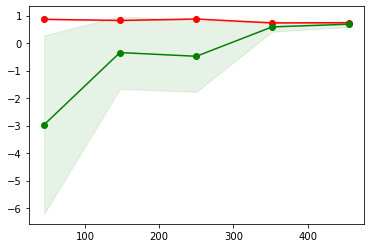

In [14]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    #plot
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha = 0.1,
                     color='r')
    plt.fill_between(train_sizes,
                     validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std,
                     alpha = 0.1,
                     color='g')                     
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training Score")
    plt.plot(train_sizes, validation_scores_mean, "o-", color='g', label="Cross Validation Score")
    
plot_learning_curve(train_sizes, train_scores, validation_scores)
    